In [161]:
import numpy as np
import pylab as pl

from vent.common.loggers import DataLogger

In [158]:
cd '../'

/home/manuel


In [176]:
dl = DataLogger()                # Get an instance of the data logger, to load compressed hdf5 files

def plot_data(filename):
    """
    Small helper function to translate hdf-file into a plottable list
    """
    dff = dl.load_file(filename) # dff is a dictionary. One can just extract waveform and control data

    ls_wv = dff['waveform_data']
    ls_ct = dff['control_data']
    data = np.zeros((len(ls_wv),2))
    for idx in range(len(ls_wv)):
        data[idx,0] = ls_wv[idx][6]  # time
        data[idx,1] = ls_wv[idx][5]  # pressure
    return data

2020-07-01 10:42:50,608 - vent.common.loggers - INFO - DataLogger init


Too many logfiles in /home/manuel/vent/logs (>1000 files). There are 1004 files. Delete some.
Saving in.../home/manuel/vent/logs/2020-07-01-10-42-0_controller_log.0.h5


In [9]:
# Running on the dinky, PEEP=8 with PEEPvalve, PIP=25 with PID
datav = plot_data("./example_logfile/2020-06-08-11-11_controller_log.0.h5")

# Running on the dinkey, PEEP=8 with PID, PIP=25 with PID
datas = plot_data("./example_logfile/2020-06-08-11-01_controller_log.0.h5")

# Running on the dinkey, PEEP=8 with PEEPVALVE, PIP = 35 with PID
datam = plot_data("./example_logfile/2020-06-08-11-17_controller_log.0.h5")

Saving in.../home/manuel/vent/logs/2020-06-24-11-50-0_controller_log.0.h5
Reading... ./example_logfile/2020-06-08-11-11_controller_log.0.h5


OSError: ``./example_logfile/2020-06-08-11-11_controller_log.0.h5`` does not exist

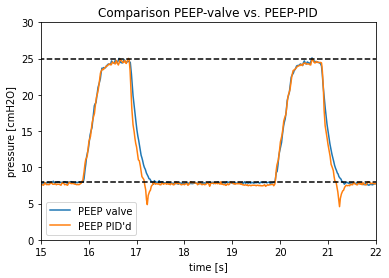

In [6]:
pl.plot(datav[:,0] - np.min(datav[:,0]), datav[:,1], label = "PEEP valve")
pl.plot(datas[:,0] - np.min(datas[:,0]), datas[:,1], label = "PEEP PID'd")

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[25,25],'k--')
pl.xlim([15,22])
pl.ylim([0,30])
pl.legend()
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]")
pl.title("Comparison PEEP-valve vs. PEEP-PID");

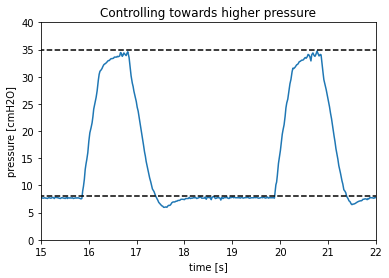

In [7]:
pl.plot(datam[:,0] - np.min(datam[:,0]), datam[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[35,35],'k--')
pl.xlim([15,22])
pl.ylim([0,40])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.title("Controlling towards higher pressure");

In [284]:
filename = "/home/manuel/vent/logs/2020-07-01-13-56_controller_log.0.h5"

data_pressure = plot_data(filename)

dff = dl.load_file(filename)

ls_wv = dff['waveform_data']
ls_ct = dff['control_data']
data = np.zeros((len(ls_wv),2))
for idx in range(len(ls_wv)):
    data[idx,0] = ls_wv[idx][6]  # time
    data[idx,1] = ls_wv[idx][0]  # control in
    
#Get the target waveform from control commands, logged here:
ls_ct = dff['control_data']

PIP = [s[4] for s in ls_ct if s['name'] == b'ValueName.PIP'][0]
PEEP = [s[4] for s in ls_ct if s['name'] == b'ValueName.PEEP'][0]
PIP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.PIP_TI'][0]
PEEP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.PEEP_T'][0]
INSP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.INSPIR'][0]
BPM = [s[4] for s in ls_ct if s['name'] == b'ValueName.BREATH'][0]
        

Saving in.../home/manuel/vent/logs/2020-07-01-10-42-1_controller_log.0.h5
Reading... /home/manuel/vent/logs/2020-07-01-13-56_controller_log.0.h5
Saving in.../home/manuel/vent/logs/2020-07-01-10-42-1_controller_log.0.h5
Reading... /home/manuel/vent/logs/2020-07-01-13-56_controller_log.0.h5


In [251]:
#Get the target waveform from control commands, logged here:
#ls_ct = dff['control_data']

#PIP = [s[4] for s in ls_ct if s['name'] == b'ValueName.PIP'][0]
#PEEP = [s[4] for s in ls_ct if s['name'] == b'ValueName.PEEP'][0]
#PIP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.PIP_TI'][0]
#PEEP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.PEEP_T'][0]
#INSP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.INSPIR'][0]
#BPM = [s[4] for s in ls_ct if s['name'] == b'ValueName.BREATH'][0]

#pl.plot([0,PIP_TIME,INSP_TIME,INSP_TIME,PEEP_TIME+INSP_TIME,60/BPM], [PEEP, PIP, PIP,PEEP,PEEP,PEEP],'o-')

(6.0, 9.0)

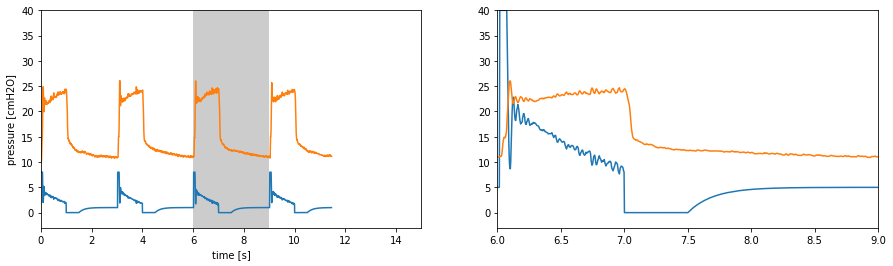

In [285]:
pl.rcParams['figure.figsize'] = [15, 4]

t1 = 6
t2 = 9
p0 = -3
p1 =40

pl.subplot(1,2,1)
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1]/5)
pl.plot(data_pressure[:,0] - np.min(data_pressure[:,0]), data_pressure[:,1])
#pl.plot([0,9],[10,10],'k--')
# pl.plot([30,60],[27.5,27.5],'k--')
pl.ylim([p0,p1])
#pl.xlim([0,70])
pl.xlim([0,15])

pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.gca().add_patch( pl.Rectangle((t1, p0), t2-t1, p1-p0, facecolor="black", alpha=0.2))

pl.subplot(1,2,2)
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1])
pl.plot(data_pressure[:,0] - np.min(data_pressure[:,0]), data_pressure[:,1])
t_target = [x+6 for x in [0,PIP_TIME,INSP_TIME,INSP_TIME,PEEP_TIME+INSP_TIME,60/BPM]]
#pl.plot(t_target, [PEEP, PIP, PIP,PEEP,PEEP,PEEP],'o-')
pl.ylim([p0,p1])
pl.xlim([t1,t2])

